In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler






In [2]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
df = pd.read_csv('yield_df.csv')

In [6]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
df = df.drop(columns=['Unnamed: 0', 'Area'])
df = pd.get_dummies(df, columns=['Item'], drop_first=True).astype(int)
df.head()

KeyError: "['Unnamed: 0', 'Area'] not found in axis"

In [118]:
df = pd.read_csv('yield_df.csv')

In [119]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [113]:
print(df['Item'].unique())

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


In [114]:
df = df.drop(columns=['Unnamed: 0', 'Area'])
df = pd.get_dummies(df, columns=['Item'], drop_first=True).astype(int)
df.head()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485,121,16,1,0,0,0,0,0,0,0,0
1,1990,66667,1485,121,16,0,0,1,0,0,0,0,0,0
2,1990,23333,1485,121,16,0,0,0,1,0,0,0,0,0
3,1990,12500,1485,121,16,0,0,0,0,1,0,0,0,0
4,1990,7000,1485,121,16,0,0,0,0,0,1,0,0,0


In [115]:
y = df['hg/ha_yield']
x = df.drop(columns=['hg/ha_yield'])

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

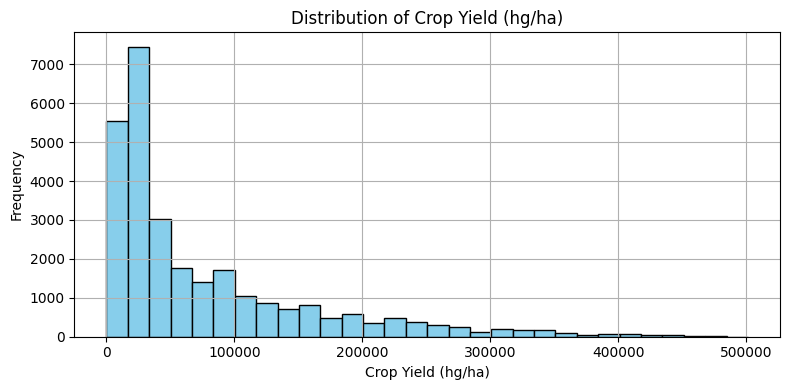

In [120]:
plt.figure(figsize=(8, 4))
plt.hist(df['hg/ha_yield'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Yield (hg/ha)')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

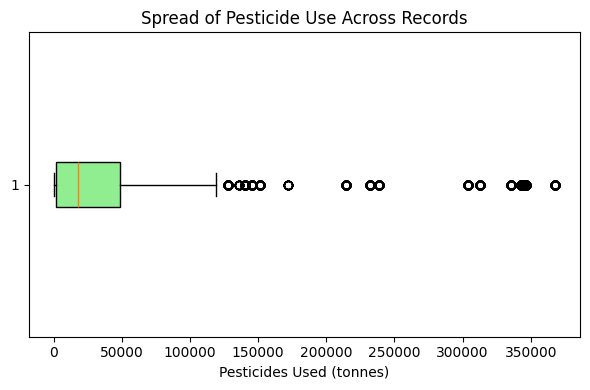

In [121]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['pesticides_tonnes'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.title('Spread of Pesticide Use Across Records')
plt.xlabel('Pesticides Used (tonnes)')
plt.tight_layout()
plt.show()

In [67]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)


In [68]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("Mean Squared Error (MSE):", round(mse_lr, 2))
print("Mean Absolute Error (MAE):", round(mae_lr, 2))
print("R² Score:", round(r2_lr, 4))

Linear Regression Results
Mean Squared Error (MSE): 2528384048.84
Mean Absolute Error (MAE): 31615.32
R² Score: 0.6514


In [69]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

In [70]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Results:")
print("MSE:", round(mse_dt, 2))
print("MAE:", round(mae_dt, 2))
print("R²:", round(r2_dt, 4))

Decision Tree Regressor Results:
MSE: 170085929.02
MAE: 3760.19
R²: 0.9766


In [71]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)


In [72]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print("MSE:", round(mse_rf, 2))
print("MAE:", round(mae_rf, 2))
print("R²:", round(r2_rf, 4))

Random Forest Regressor Results:
MSE: 105661691.59
MAE: 3720.48
R²: 0.9854


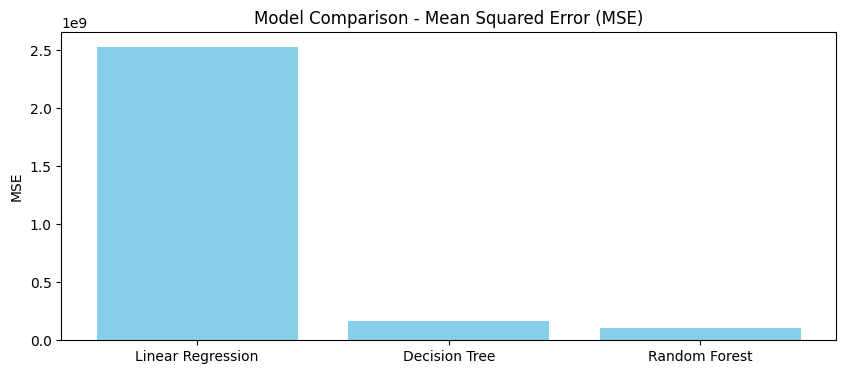

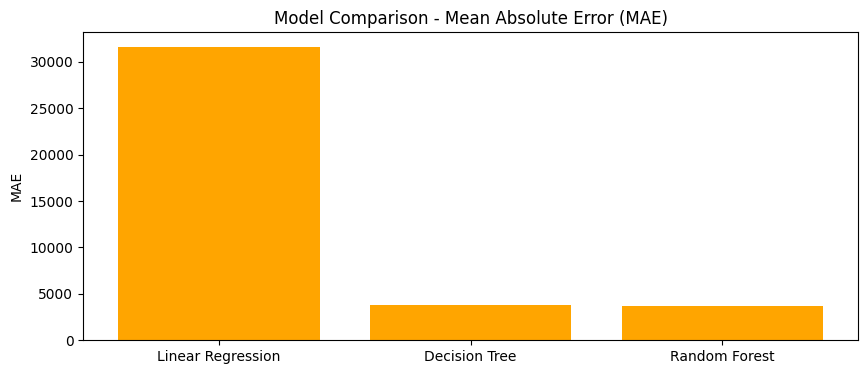

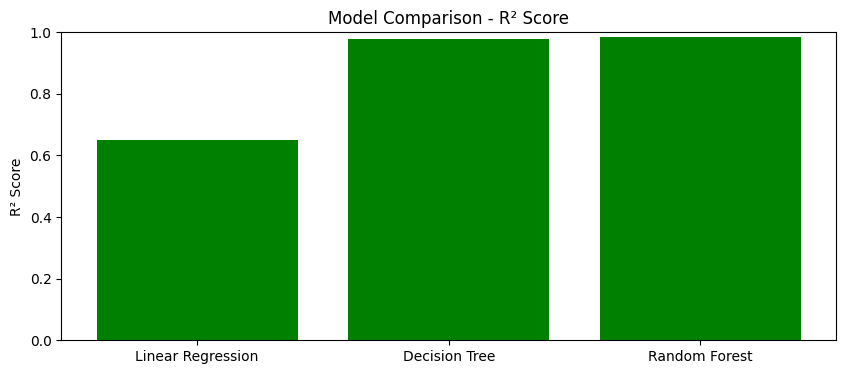

In [73]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse = [mse_lr, mse_dt, mse_rf]
mae = [mae_lr, mae_dt, mae_rf]
r2 = [r2_lr, r2_dt, r2_rf]

# PLOT MSE
plt.figure(figsize=(10,4))
plt.bar(models, mse, color='skyblue')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

# PLOT MAE
plt.figure(figsize=(10,4))
plt.bar(models, mae, color='orange')
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.show()

# PLOT R²
plt.figure(figsize=(10,4))
plt.bar(models, r2, color='green')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0,1)  
plt.show()

In [74]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

In [75]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Results:")
print("MSE:", round(mse_xgb, 2))
print("MAE:", round(mae_xgb, 2))
print("R²:", round(r2_xgb, 4))

XGBoost Regressor Results:
MSE: 533689824.0
MAE: 13293.05
R²: 0.9264


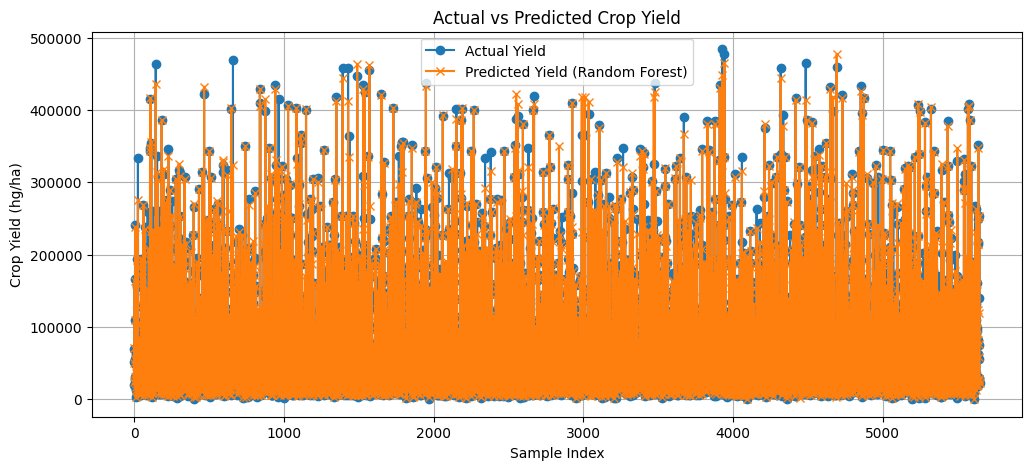

In [76]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual Yield', marker='o')
plt.plot(y_pred_rf, label='Predicted Yield (Random Forest)', marker='x')

plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Sample Index')
plt.ylabel('Crop Yield (hg/ha)')
plt.legend()
plt.grid(True)
plt.show()



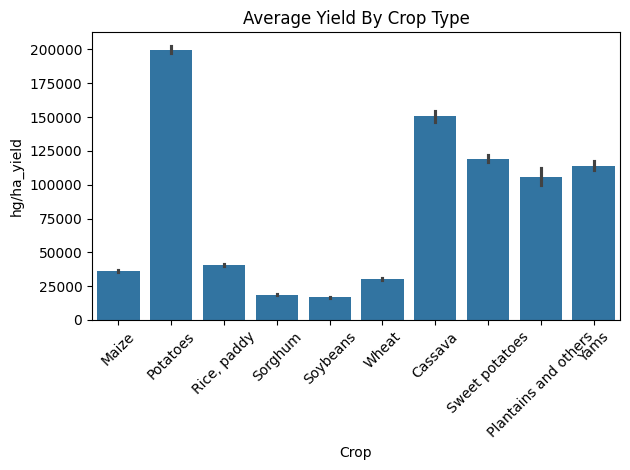

In [77]:
df_clean = pd.read_csv('yield_df.csv')
sns.barplot(data=df_clean, x='Item', y='hg/ha_yield')
plt.xticks(rotation=45)
plt.title('Average Yield By Crop Type')
plt.ylabel('hg/ha_yield')
plt.xlabel('Crop')
plt.tight_layout()
plt.show()

In [78]:
features_for_clustering = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']]
scaled = StandardScaler().fit_transform(features_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

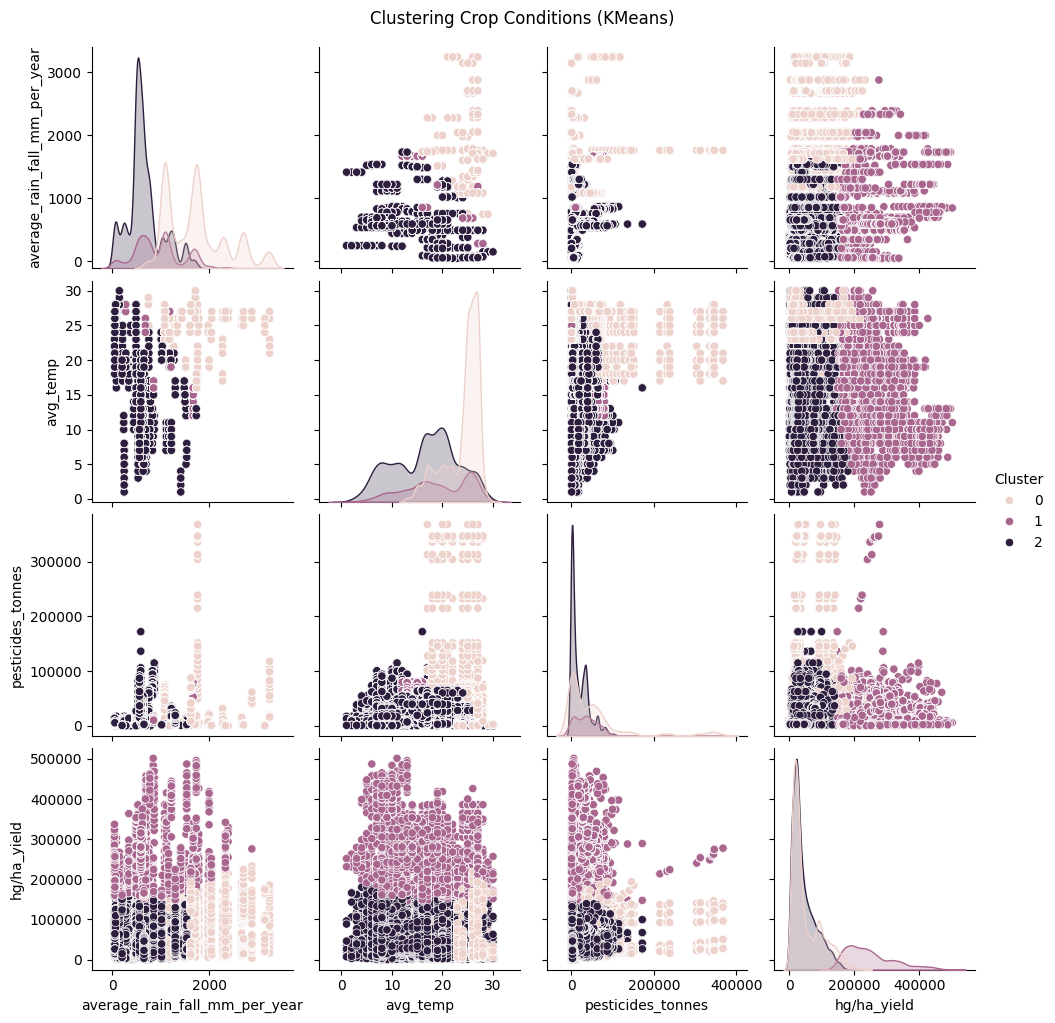

In [79]:
sns.pairplot(df, hue='Cluster', vars=['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield'])
plt.suptitle("Clustering Crop Conditions (KMeans)", y=1.02)
plt.show()

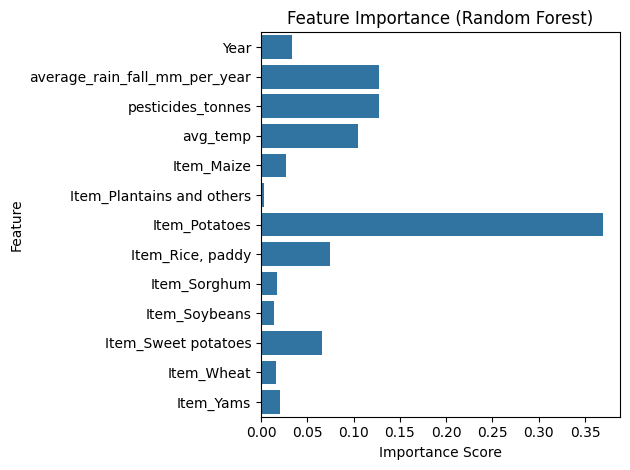

In [80]:
importances = rf_model.feature_importances_
features = x.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

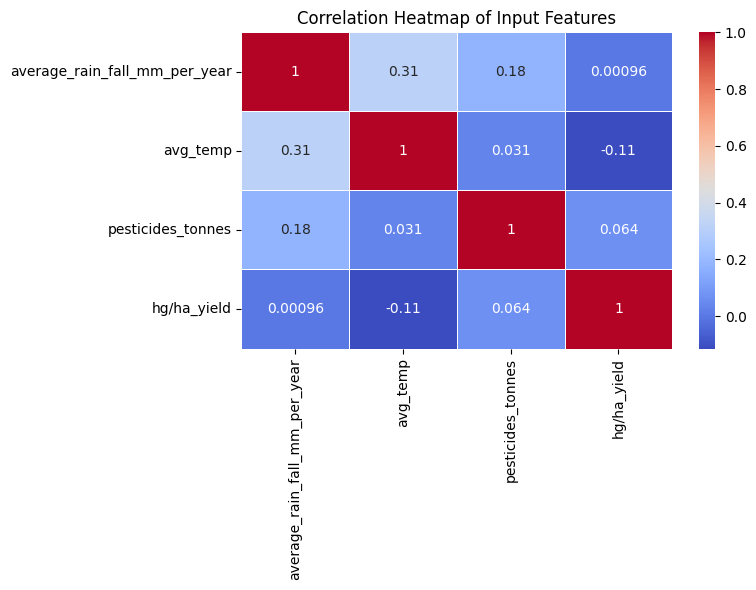

In [81]:
correlation_features = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']]
correlation_matrix = correlation_features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Input Features')
plt.tight_layout()
plt.show()

In [83]:
import joblib 
joblib.dump(rf_model, 'crop_yield_rf_model.pkl')

['crop_yield_rf_model.pkl']

In [85]:
df = pd.read_csv('yield_df.csv')

In [86]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [87]:
df[df['Item'] == 'Cassava'].head(1)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
213,213,Angola,Cassava,1990,41177,1010.0,64.0,24.12


In [88]:
df[df['Item'] == 'Cassava'].shape

(2045, 8)

In [89]:
df[df['Item'] == 'Wheat'].head(1)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37


In [90]:
df[df['Item'] == 'Rice, paddy'].head(1)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


In [91]:
df['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [93]:
df[df['Item'] == 'Potatoes'].head(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
13,13,Albania,Potatoes,1992,82920,1485.0,121.0,16.06
19,19,Albania,Potatoes,1993,98446,1485.0,121.0,16.05
24,24,Albania,Potatoes,1994,81404,1485.0,201.0,16.96


In [106]:
df[df['Item'] == 'Maize'].head(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
12,12,Albania,Maize,1992,24876,1485.0,121.0,16.06
18,18,Albania,Maize,1993,24185,1485.0,121.0,16.05
23,23,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [107]:
df[df['Item'] == 'Rice, paddy'].head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.00,15.36
14,14,Albania,"Rice, paddy",1992,40000,1485.0,121.00,16.06
20,20,Albania,"Rice, paddy",1993,41786,1485.0,121.00,16.05
101,101,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
106,106,Algeria,"Rice, paddy",1991,26786,89.0,2461.80,16.26
111,111,Algeria,"Rice, paddy",1992,24733,89.0,1215.47,16.27
116,116,Algeria,"Rice, paddy",1993,23111,89.0,1021.89,17.00
121,121,Algeria,"Rice, paddy",1994,21374,89.0,1255.02,17.88
125,125,Algeria,"Rice, paddy",1995,19598,89.0,2697.09,17.36


In [108]:
df[
    (df['Item'] == 'Rice, paddy') &
    (df['average_rain_fall_mm_per_year'] == 1485) &
    (df['avg_temp'].between(16.5, 17.5)) &  # allow ±0.5 margin
    (df['pesticides_tonnes'].between(195, 205))
]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


In [94]:
df = pd.read_csv("yield_df.csv")

In [95]:
X = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']]
crop_cols = ['Item_Maize', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 
             'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Cassava', 
             'Item_Yams', 'Item_Wheat', 'Item_Plantains and others']

X = pd.concat([X, df[crop_cols]], axis=1)

KeyError: "None of [Index(['Item_Maize', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum',\n       'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Cassava', 'Item_Yams',\n       'Item_Wheat', 'Item_Plantains and others'],\n      dtype='object')] are in the [columns]"

In [96]:
df = pd.read_csv('yield_df.csv')


In [97]:
df_encoded = pd.get_dummies(df, columns=['Item'], prefix='Item')
df_encoded.columns

Index(['Unnamed: 0', 'Area', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object')

In [98]:
x = df_encoded[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']]
crop_cols = ['Item_Maize', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum',
             'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Cassava', 'Item_Yams',
             'Item_Wheat', 'Item_Plantains and others']
X = pd.concat([x, df_encoded[crop_cols]], axis=1)

In [99]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'crop_scaler.pkl')

['crop_scaler.pkl']

In [100]:
df = pd.read_csv("yield_df.csv")

In [101]:
df_encoded = pd.get_dummies(df, columns=['Item'], prefix='Item')
X = df_encoded[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes'] +
               [col for col in df_encoded.columns if col.startswith('Item_')]]

y = df_encoded['hg/ha_yield']

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled, y)

RandomForestRegressor()

In [104]:
import joblib
joblib.dump(model, 'crop_yield_rf_model_scaled.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [105]:
print(X.columns.tolist())

['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'Item_Cassava', 'Item_Maize', 'Item_Plantains and others', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams']


In [154]:
df = pd.read_csv('yield_df.csv')

In [155]:
selected_crops = ['Potatoes', 'Maize', 'Wheat', 'Rice, paddy', 'Soybeans', 'Sorghum', 'Sweet potatoes', 'Cassava']
df = df[df['Item'].isin(selected_crops)]

In [156]:
def augment_crop_data(df, crop, target_count):
    crop_df = df[df['Item'] == crop]
    current_count = len(crop_df)
    if current_count < target_count:
        extra_needed = target_count - current_count
        additional = crop_df.sample(extra_needed, replace=True, random_state=42)
        df = pd.concat([df, additional], ignore_index=True)
    return df

In [157]:
df = augment_crop_data(df, 'Wheat', 4100)
df = augment_crop_data(df, 'Rice, paddy', 4100)
df = augment_crop_data(df, 'Sweet potatoes', 4100)

df = augment_crop_data(df, 'Cassava', 4000)
df = augment_crop_data(df, 'Soybeans', 4000)
df = augment_crop_data(df, 'Sorghum', 4000)


In [158]:
df.drop(columns=['Area', 'Unnamed: 0', 'Year'], inplace=True)
df_encoded = pd.get_dummies(df, columns=['Item'], prefix='Item')

In [159]:
df['Item'].value_counts()

Item
Potatoes          4276
Maize             4121
Rice, paddy       4100
Wheat             4100
Sweet potatoes    4100
Sorghum           4000
Soybeans          4000
Cassava           4000
Name: count, dtype: int64

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import joblib 

In [161]:
df_encoded['hg/ha_yield'] = df['hg/ha_yield']

In [163]:
x = df_encoded.drop(columns=['hg/ha_yield'])
y = df_encoded['hg/ha_yield']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("R2 Score:", round(r2_score(y_test, y_pred), 4))

joblib.dump(model, 'crop_rf_model_minmax.pkl')
joblib.dump(scaler, 'scaler_crop_minmax.pkl')

MAE: 4480.36
R2 Score: 0.981


['scaler_crop_minmax.pkl']

In [164]:
print(x_train.columns.tolist())

['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Item_Cassava', 'Item_Maize', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Wheat']


In [168]:
df[df['Item'] == 'Sorghum'][['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']]

,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,hg/ha_yield
3,1485.0,16.37,121.00,12500
9,1485.0,15.36,121.00,6667
15,1485.0,16.06,121.00,3747
102,89.0,17.48,1828.92,16571
107,89.0,16.26,2461.80,24231
...,...,...,...,...
32692,346.0,18.59,13697.00,8011
32693,1083.0,26.34,72133.00,6553
32694,346.0,18.20,13697.00,9475
32695,494.0,26.36,5518.00,5910


In [152]:
print(x_train.columns.tolist())

['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Item_Cassava', 'Item_Maize', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Wheat']


In [ ]:
df.sample(10)

,Unnamed: 0,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
10253,11147,Soybeans,1993,10857,1083.0,66388.00,26.34
3215,3296,Soybeans,1997,22977,1761.0,110276.11,27.57
7297,7930,"Rice, paddy",2008,40639,2274.0,15396.14,17.16
6459,6946,Potatoes,1994,84888,1113.0,3046.67,11.33
51,51,Maize,2001,38135,1485.0,628.79,16.59
7512,8160,Sweet potatoes,1995,259786,51.0,4391.00,21.56
10785,11679,Soybeans,1996,10319,1083.0,56114.00,25.31
13212,14106,"Rice, paddy",2011,35878,1083.0,55540.00,24.50
29795,474,Cassava,1996,100000,591.0,54595.00,17.97
28659,4789,Sweet potatoes,2013,130913,1761.0,367778.00,17.57


In [135]:
df[ 
    (df['Item'] == 'Potatoes') &
    (df['average_rain_fall_mm_per_year'] <= 3000) &
    (df['avg_temp'] <= 50) &
    (df['pesticides_tonnes'] <= 500)
]

,Unnamed: 0,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
1,1,Potatoes,1990,66667,1485.0,121.0,16.37
7,7,Potatoes,1991,77818,1485.0,121.0,15.36
13,13,Potatoes,1992,82920,1485.0,121.0,16.06
19,19,Potatoes,1993,98446,1485.0,121.0,16.05
24,24,Potatoes,1994,81404,1485.0,201.0,16.96
...,...,...,...,...,...,...,...
25916,27315,Potatoes,2009,46286,1180.0,88.0,24.18
25924,27324,Potatoes,2010,47714,1180.0,88.0,24.14
25932,27333,Potatoes,2011,49920,1180.0,88.0,23.89
25940,27342,Potatoes,2012,49440,1180.0,88.0,24.03
